* Seaborn is a statistical plotting library.
* It has beautiful default styles.
* It also is designed to work very wel with pandas dataframe objects.

In [1]:
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Distribution Plot

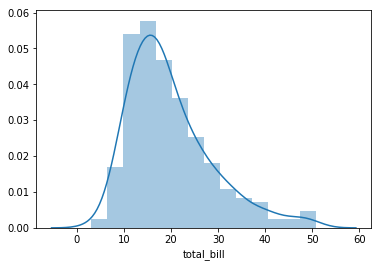

In [4]:
sns.distplot(tips['total_bill'])

# Joint Plot

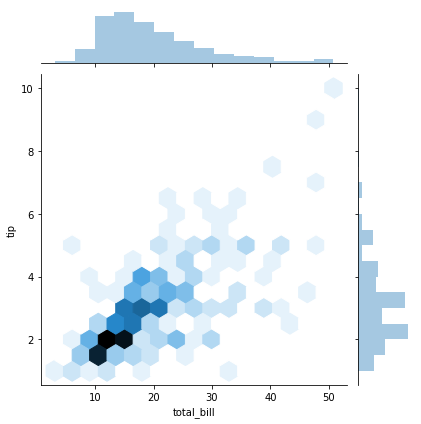

In [5]:
sns.jointplot(x='total_bill',y='tip', data=tips,kind='hex')

# Pair Plot

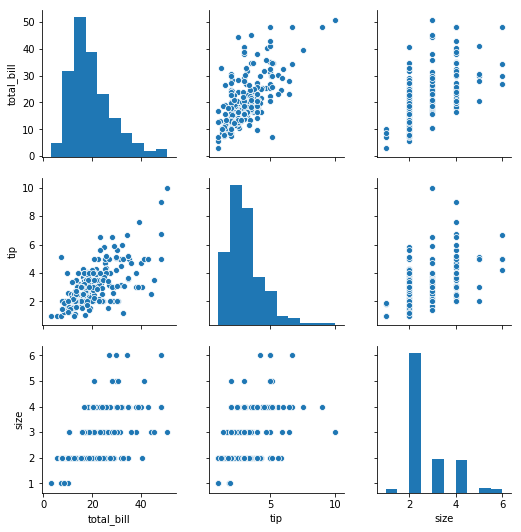

In [6]:
sns.pairplot(tips)

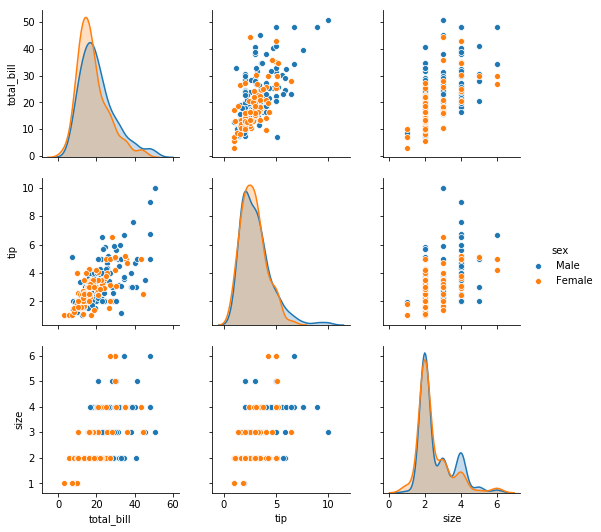

In [7]:
sns.pairplot(tips,hue='sex')

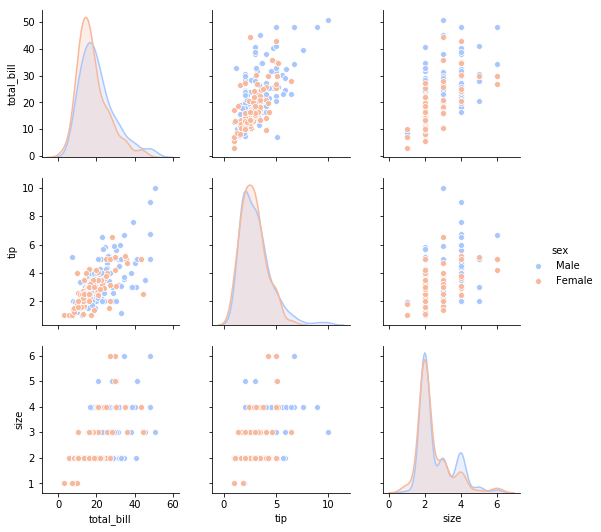

In [8]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

# Rugplot

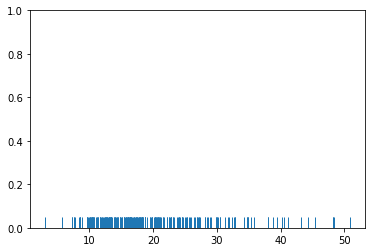

In [9]:
sns.rugplot(tips['total_bill'])

# kdeplot - Kernel Density Estimate 

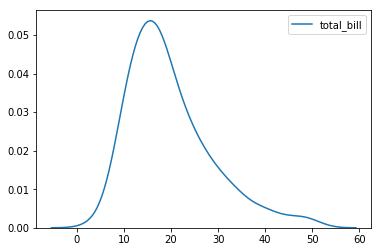

In [10]:
sns.kdeplot(tips['total_bill'])

(0, 1)

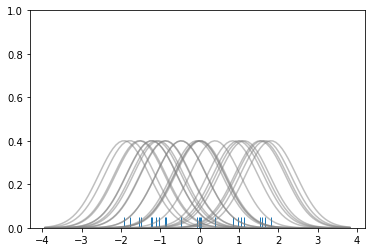

In [11]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

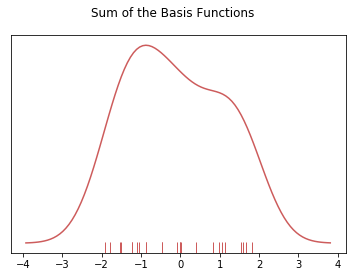

In [12]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

# Categorical Plots

Barplot 

In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


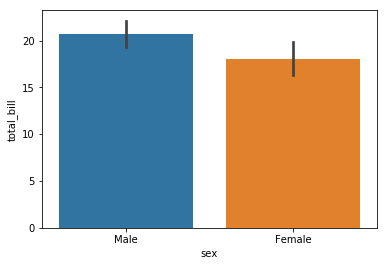

In [14]:
 sns.barplot(x='sex',y='total_bill',data=tips)

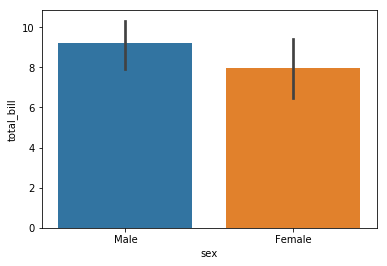

In [15]:
import numpy as np
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

Countplot

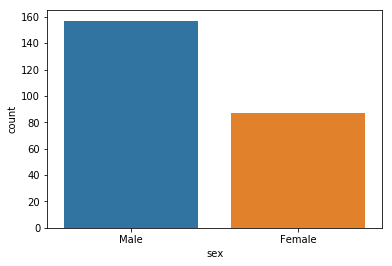

In [16]:
sns.countplot(x='sex',data=tips)

Box Plot

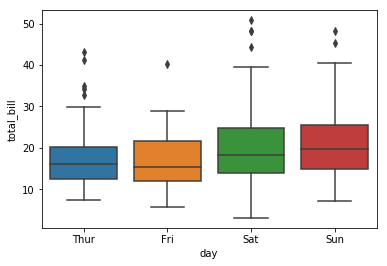

In [17]:
sns.boxplot(x='day',y='total_bill',data=tips)

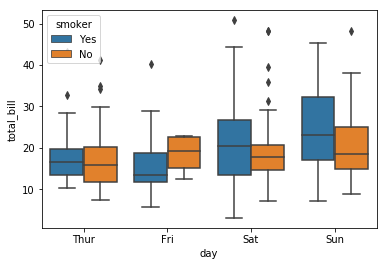

In [18]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

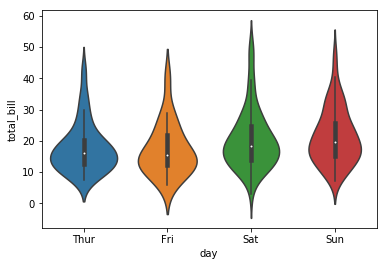

In [19]:
sns.violinplot( x='day',y='total_bill',data=tips)

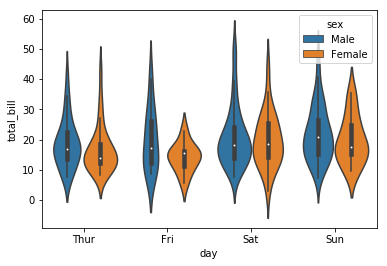

In [20]:
sns.violinplot( x='day',y='total_bill',data=tips,hue='sex')

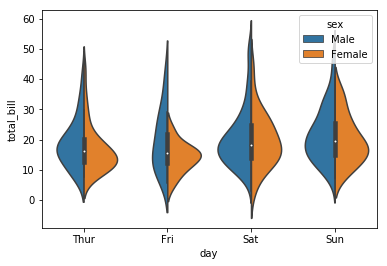

In [21]:
sns.violinplot( x='day',y='total_bill',data=tips,hue='sex',split=True)

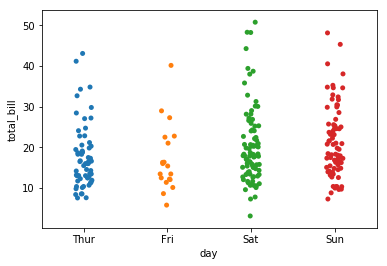

In [22]:
sns.stripplot(x='day',y='total_bill',data=tips)

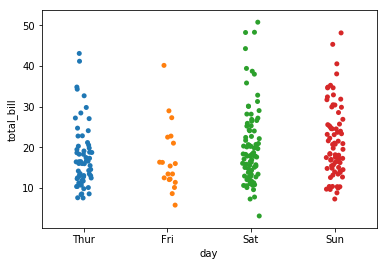

In [23]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)

C:\Users\Sanket\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


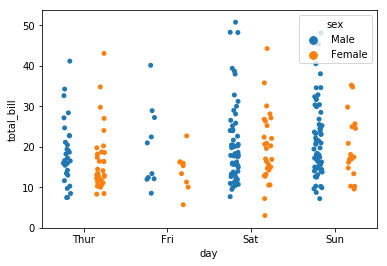

In [24]:
sns.stripplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

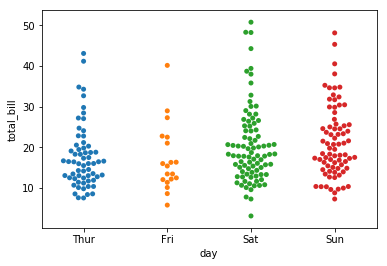

In [25]:
sns.swarmplot(x='day',y='total_bill',data=tips)

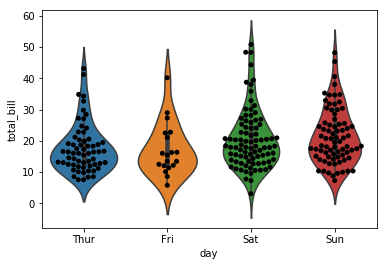

In [26]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

C:\Users\Sanket\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


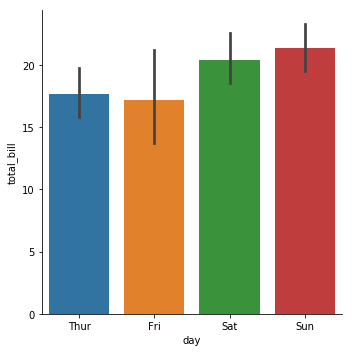

In [27]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

# Matrix Plots

In [29]:
import seaborn as sns
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [30]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [36]:
tc = tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


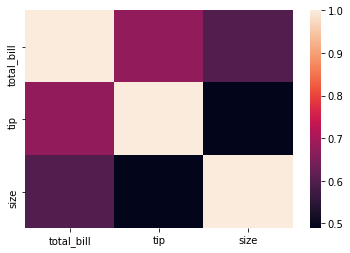

In [37]:
sns.heatmap(tc)

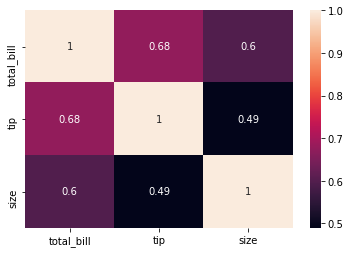

In [38]:
sns.heatmap(tc,annot=True)

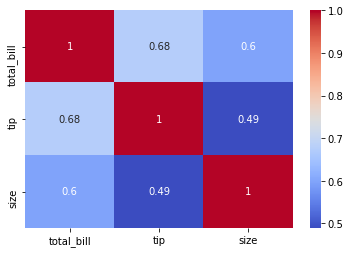

In [39]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [41]:
fp =flights.pivot_table(index='month',columns='year',values='passengers')

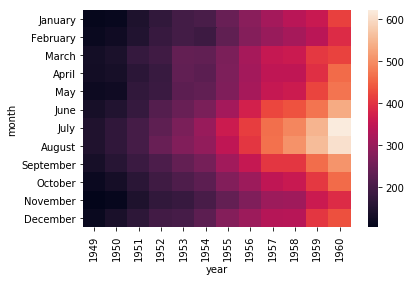

In [43]:
sns.heatmap(fp)

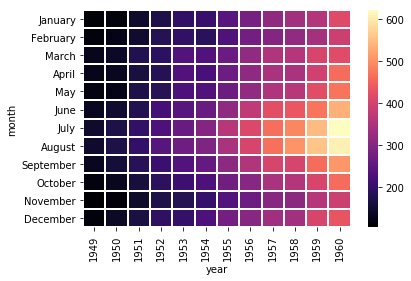

In [45]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=1)

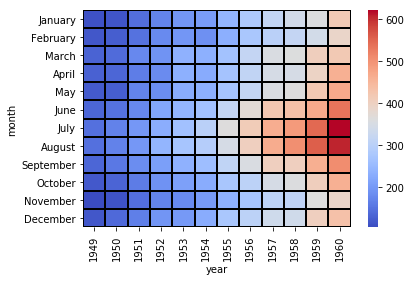

In [46]:
sns.heatmap(fp,cmap='coolwarm',linecolor='black',linewidths=1)

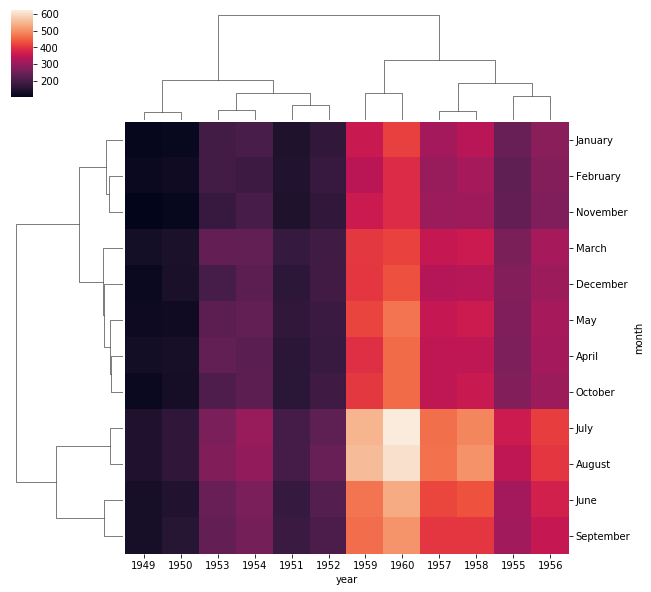

In [47]:
sns.clustermap(fp)

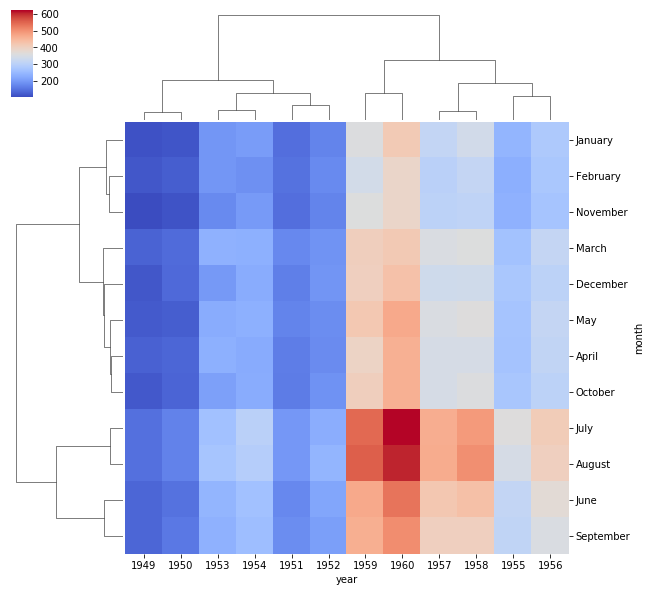

In [53]:
sns.clustermap(fp,cmap='coolwarm')

# Grids

In [54]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [55]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

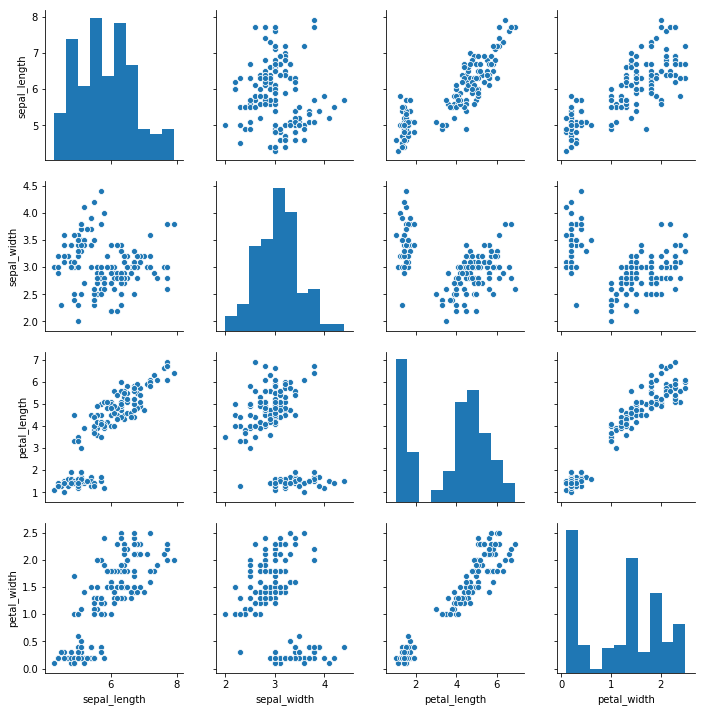

In [57]:
sns.pairplot(iris)

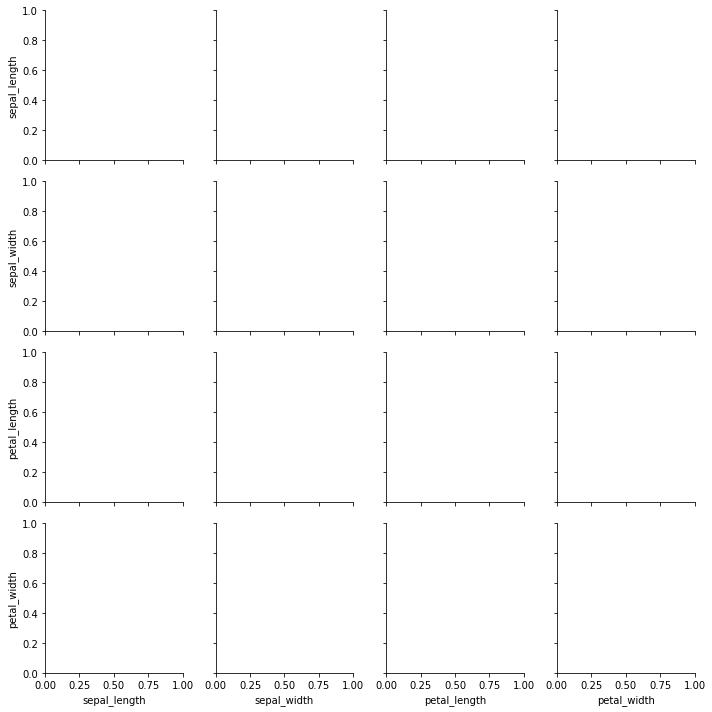

In [58]:
sns.PairGrid(iris)

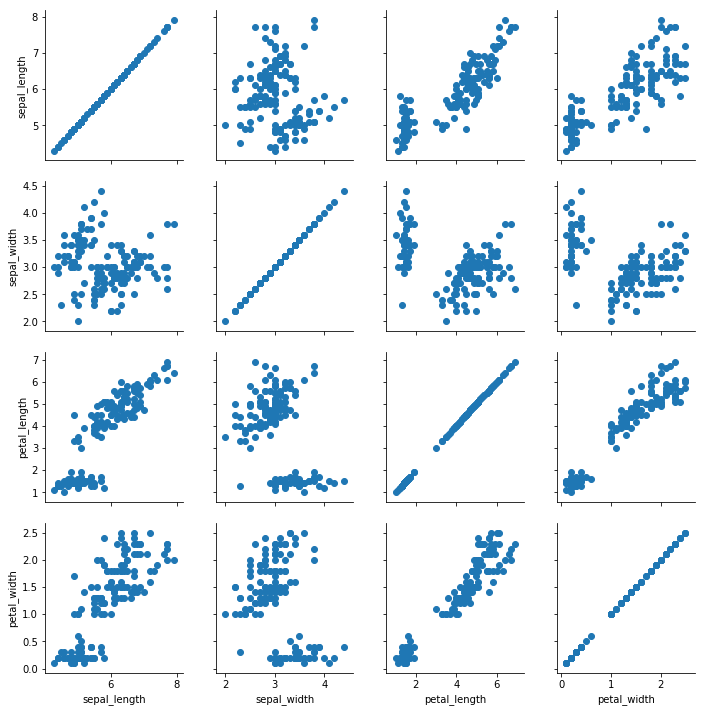

In [60]:
g=sns.PairGrid(iris)
g.map(plt.scatter)

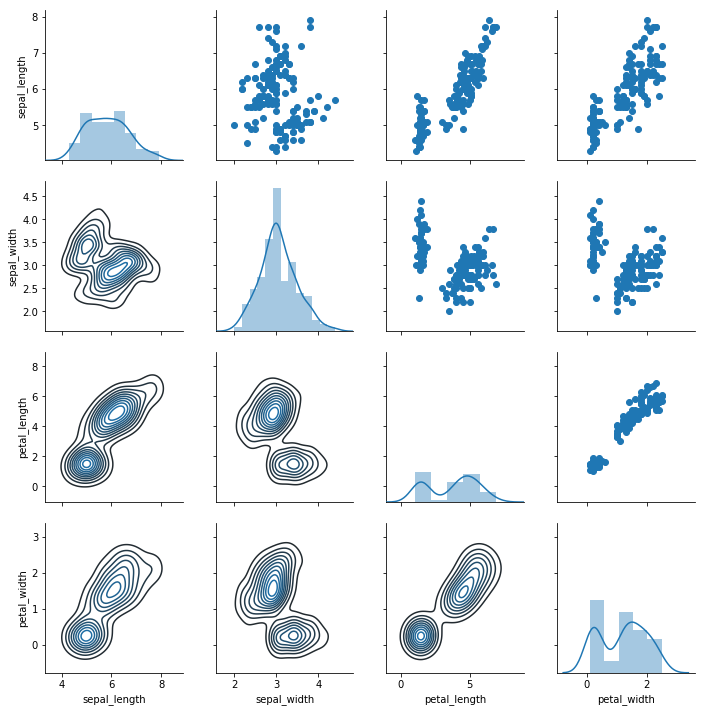

In [61]:
g=sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_diag(sns.distplot)
g.map_lower(sns.kdeplot)

In [62]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


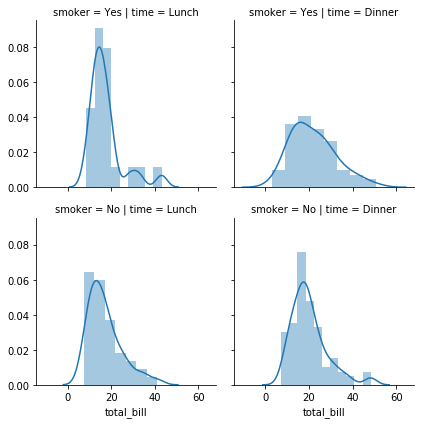

In [64]:
g=sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')
sns.distplot